## Bank Customer Churn Prediction using ML Algorithms

In this project, we will be using the Bank Customer Churn Prediction dataset from Kaggle to predict whether a customer will leave the bank or not. We will be using various machine learning algorithms to predict the outcome and compare the results.

In [1]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import git

In [2]:
# colorblind friendly colors
sns.set_palette("colorblind")

### 1. Exploratory Data Analysis

In [3]:
repo_path = git.Repo('.', search_parent_directories=True).working_tree_dir
print(repo_path)

/home/pops/myProjects/predictive_modeling


In [4]:
data_path = repo_path + '/data/Bank_Customer_Churn_Prediction.csv'
df = pd.read_csv(data_path)
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# check for missing values
#df.isnull().sum()

In [6]:
# check for duplicates
#df.duplicated().sum()

In [7]:
# check data types
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

#### Let's do a couple of plots 

#### 1.1 estimated_salary vs churn

<Axes: xlabel='churn', ylabel='estimated_salary'>

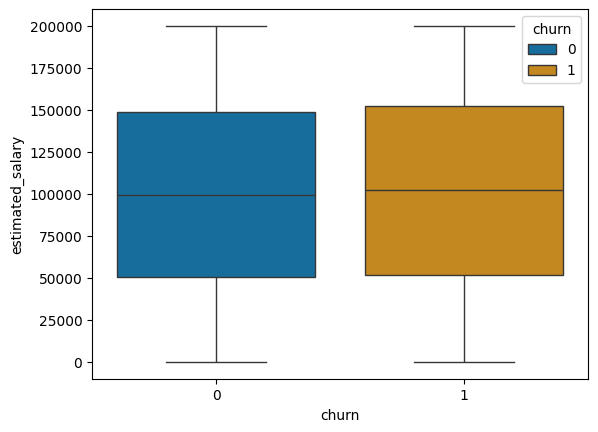

In [8]:
# estimated_salary vs churn
sns.boxplot(x='churn', y='estimated_salary', data=df, hue='churn')

#### Check of class imbalance

<Axes: xlabel='churn', ylabel='count'>

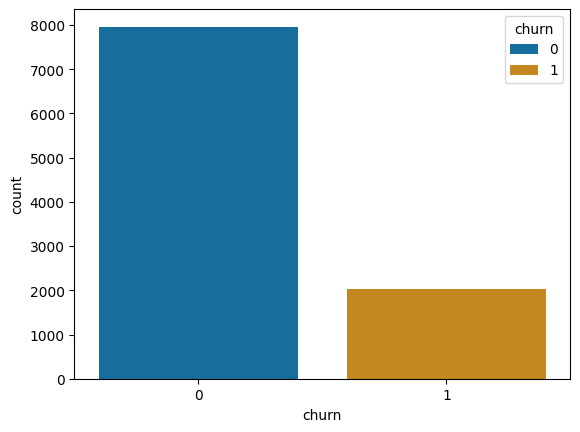

In [9]:
# class imbalance
sns.countplot(x='churn', data=df, hue='churn')

### 3. Data Preprocessing

In [10]:
# get rid of "customer_id" column
df = df.drop('customer_id', axis=1)

In [11]:
# encode categorical variables
def encode_categorical(df):
    # find categorical columns
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    # encode categorical columns
    for col in categorical_columns:
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
    return df

In [12]:
# encode categorical variables
df = encode_categorical(df)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# fidn correlation between features
corr = df.corr()['churn'].sort_values(ascending=False)
corr

churn               1.000000
age                 0.285323
balance             0.118533
country             0.035943
estimated_salary    0.012097
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
gender             -0.106512
active_member      -0.156128
Name: churn, dtype: float64

In [14]:
# split data into train and test sets
X = df.drop('churn', axis=1).values
y = df['churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Model Building and Evaluation

In [15]:
xgb = xgb.XGBClassifier()

# train model
xgb.fit(X_train, y_train)

# make predictions
y_pred = xgb.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))
    

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

